In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

PATH_IN_AMM75 = "/gws/nopw/j04/campus/USERS/anwise/AMM75/AMM75_MOMENTUM/CROSS_SLOPE_FLOW/"
PATH_IN_AMM15 = "/gws/nopw/j04/campus/USERS/anwise/AMM15/AMM15_MOMENTUM/CROSS_SLOPE_FLOW/"

In [2]:
amm75_ds = xr.open_dataset( PATH_IN_AMM75 + "amm75_voltransport_streamfunction_mom_2015.nc" ).sel(
    season=["DJF","MAM","JJA","SON"])
amm75_ds["depths"] = np.arange(30,110,10)
amm15_ds = xr.open_dataset( PATH_IN_AMM15 + "amm15_voltransport_streamfunction_mom_2015.nc" ).sel(
    season=["DJF","MAM","JJA","SON"])
amm15_ds["depths"] = np.arange(30,110,10)

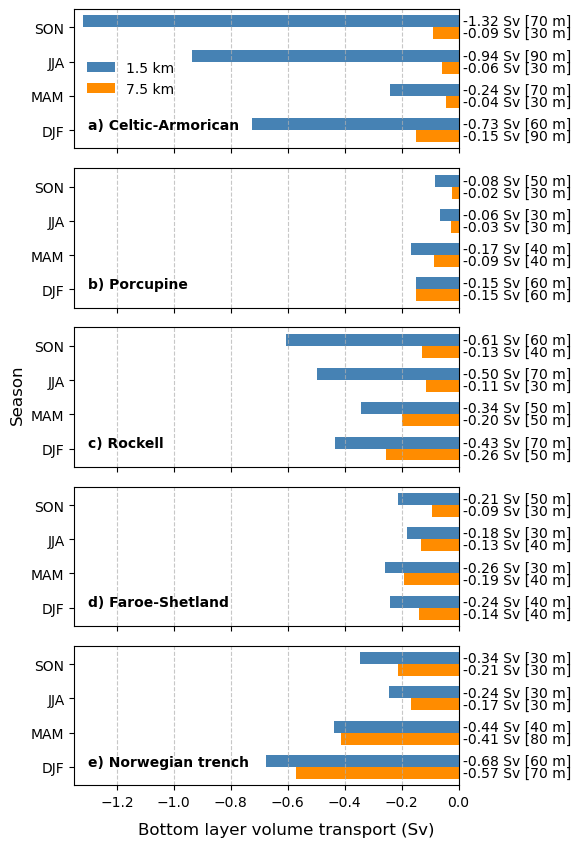

In [3]:
# For figure 10

# index and height of max off-0shore flow due to zdf in the norwegian trench
#nt_zdf_highet_75 = [4,5,0,0] #[70m, 80m, 30m, 30m]
#nt_zdf_highet_15 = [3,1,0,0] #[60m, 40m, 30m, 30m]
nt_zdf_highet_75 = xr.DataArray( data=[4,5,0,0], dims="season")
nt_zdf_highet_15 = xr.DataArray( data=[3,1,0,0], dims="season")

# Create a figure with subplots (5 rows, 1 column)
fig, axes = plt.subplots(5, 1, figsize=(6, 10), sharex=True)
plt.subplots_adjust(hspace=0.1)  # Adjust space between subplots

# Set the width of bars
height = 0.35
y = np.arange(len(amm75_ds.season))

# Max value for consistent x-axis scale
#max_value_amm75 = max([max(max(d[0]), max(d[1])) for d in amm75_da.values])
#max_value_amm15 = max([max(max(d[0]), max(d[1])) for d in amm15_da.values])
max_value = max(np.abs(amm75_ds).max(), np.abs(amm75_ds).max()) * 1.1
title_ls = ["a) ","b) ","c) ","d) ","e) "]
# Create horizontal bars for each section
for i, section in enumerate(amm75_ds.section):
    ax = axes[i]

    if section == 'Norw Trench':
        V_75 = amm75_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i, depths=nt_zdf_highet_75)
        V_depth_75 = V_75.depths.values
        V_15 = amm15_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i, depths=nt_zdf_highet_15)
        V_depth_15 = V_15.depths.values
    else:
        V_75 = amm75_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i).min(dim="depths")
        V_depth_75 = amm75_ds.depths.isel(depths=
            amm75_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i).argmin(dim="depths")
        ).values
        V_15 = amm15_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i).min(dim="depths")
        V_depth_15 = amm15_ds.depths.isel(depths=
            amm15_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i).argmin(dim="depths")
        ).values
    
    #print( amm75_transports )
    #print( y - height/2 )
    
    # Create the horizontal bars
    bars2 = ax.barh(y + height/2, V_15.values / 1000000, height, label='1.5 km', color='steelblue')
    bars1 = ax.barh(y - height/2, V_75.values / 1000000, height, label='7.5 km', color='darkorange')
    
    # Add section title
#    ax.set_title(f'{section}', fontsize=12)
    
    # Set y-ticks (variable)
    ax.set_yticks(y)
    ax.set_yticklabels(amm75_ds.season.values)
    
    # Set x-limit for consistent scale
    ax.set_xlim(-1.35,0) #(-max_value, 0)
    
    # Add grid lines for better readability
    ax.grid(True, linestyle='--', alpha=0.7, axis='x')

    sec_name = ["Celtic-Armorican", "Porcupine", "Rockell", "Faroe-Shetland", "Norwegian trench"]
    #if section == 'Norw Trench':
    #    section = 'Norwegian \n    Trench'
    ax.text(-1.3, 0.04, title_ls[i] + sec_name[i], fontsize=10, weight='bold', ha='left')
    
    # Add values on bars
    def add_labels(bars, depths):
        for idx, bar in enumerate(bars):
            width = bar.get_width()
            #if section == 'Norwegian \n Trench':
            #    depth = " (30 m)"
            #else:
            depth = " Sv [" + str(depths[idx]) + " m]"
            ax.annotate(f'{width:.2f}' + depth,
                        xy=(0, bar.get_y() + bar.get_height() / 2),
                        #xy=(width, bar.get_y() + bar.get_height() / 2),
                        xytext=(3, 0),  # 3 points horizontal offset
                        textcoords="offset points",
                        ha='left', va='center')
    
    add_labels(bars2, V_depth_15)
    add_labels(bars1, V_depth_75)
    
    
    # Only add legend to the first subplot
    if i == 0:
        ax.legend(loc='center left',frameon=False)

# Add common x-label
#fig.text(0.5, 0.04, 'Bottom 75 m section mean volume transport (m$^2$/s) \n (volume transport per metre of shelf-edge)', ha='center', fontsize=12)
fig.text(0.5, 0.06, 'Bottom layer volume transport (Sv)', ha='center', fontsize=12)

# Add common y-label (optional)
fig.text(0.04, 0.5, 'Season', va='center', rotation='vertical', fontsize=12)

# Add overall title
#fig.suptitle('Comparison of Volume Transports Between Two Models Across Different sections', fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.07, 1, 0.9])  # Adjust for common labels

# Show the plot
plt.show()

# To save the figure if needed
#fig.savefig('/home/users/anwise/PISCES/FIGS/Fig8_bottomlayer_section_volume_transport.jpg', dpi=300, bbox_inches='tight')

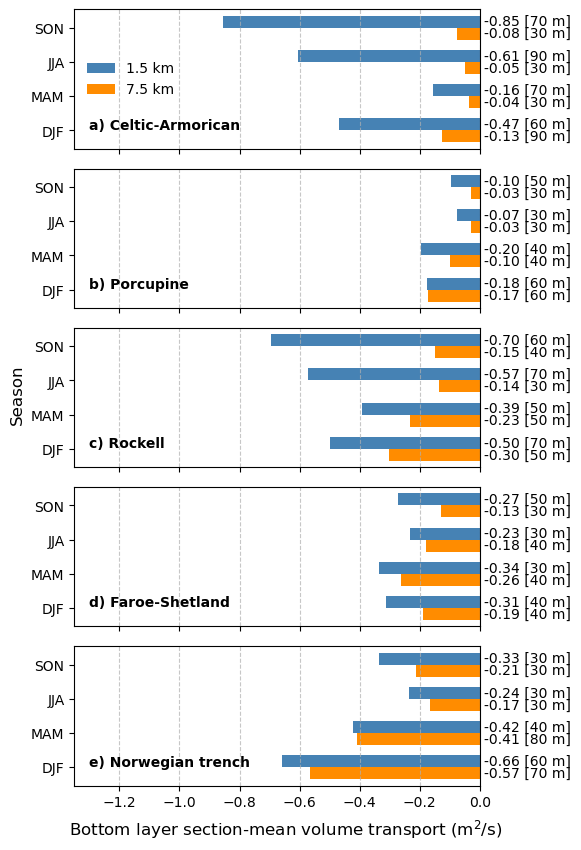

In [4]:
# For supplemental figure

# index and height of max off-0shore flow due to zdf in the norwegian trench
#nt_zdf_highet_75 = [4,5,0,0] #[70m, 80m, 30m, 30m]
#nt_zdf_highet_15 = [3,1,0,0] #[60m, 40m, 30m, 30m]
nt_zdf_highet_75 = xr.DataArray( data=[4,5,0,0], dims="season")
nt_zdf_highet_15 = xr.DataArray( data=[3,1,0,0], dims="season")

# Create a figure with subplots (5 rows, 1 column)
fig, axes = plt.subplots(5, 1, figsize=(6, 10), sharex=True)
plt.subplots_adjust(hspace=0.1)  # Adjust space between subplots

# Set the width of bars
height = 0.35
y = np.arange(len(amm75_ds.season))

# Max value for consistent x-axis scale
#max_value_amm75 = max([max(max(d[0]), max(d[1])) for d in amm75_da.values])
#max_value_amm15 = max([max(max(d[0]), max(d[1])) for d in amm15_da.values])
max_value = max(np.abs(amm75_ds).max(), np.abs(amm75_ds).max()) * 1.1
title_ls = ["a) ","b) ","c) ","d) ","e) "]
# Create horizontal bars for each section
for i, section in enumerate(amm75_ds.section):
    ax = axes[i]

    if section == 'Norw Trench':
        V_75 = amm75_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i, depths=nt_zdf_highet_75)
        V_depth_75 = V_75.depths.values
        V_15 = amm15_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i, depths=nt_zdf_highet_15)
        V_depth_15 = V_15.depths.values
    else:
        V_75 = amm75_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i).min(dim="depths")
        V_depth_75 = amm75_ds.depths.isel(depths=
            amm75_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i).argmin(dim="depths")
        ).values
        V_15 = amm15_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i).min(dim="depths")
        V_depth_15 = amm15_ds.depths.isel(depths=
            amm15_ds.streamfunction[:-1,:,:,:].sel(variable="trd_pvo_e3").isel(section=i).argmin(dim="depths")
        ).values

   
    #print( amm75_transports )
    #print( y - height/2 )
    
    # Create the horizontal bars
    bars2 = ax.barh(y + height/2, (V_15 / amm15_ds.length_section[i]).values, height, label='1.5 km', color='steelblue')
    bars1 = ax.barh(y - height/2, (V_75 / amm75_ds.length_section[i]).values, height, label='7.5 km', color='darkorange')
   
    
    # Add section title
#    ax.set_title(f'{section}', fontsize=12)
    
    # Set y-ticks (variable)
    ax.set_yticks(y)
    ax.set_yticklabels(amm75_ds.season.values)
    
    # Set x-limit for consistent scale
    ax.set_xlim(-1.35,0) #(-max_value, 0)
    
    # Add grid lines for better readability
    ax.grid(True, linestyle='--', alpha=0.7, axis='x')

    sec_name = ["Celtic-Armorican", "Porcupine", "Rockell", "Faroe-Shetland", "Norwegian trench"]
    #if section == 'Norw Trench':
    #    section = 'Norwegian \n    Trench'
    ax.text(-1.3, 0.04, title_ls[i] + sec_name[i], fontsize=10, weight='bold', ha='left')
    
    # Add values on bars
    def add_labels(bars, depths):
        for idx, bar in enumerate(bars):
            width = bar.get_width()
            #if section == 'Norwegian \n Trench':
            #    depth = " (30 m)"
            #else:
            depth = " [" + str(depths[idx]) + " m]"
            ax.annotate(f'{width:.2f}' + depth,
                        xy=(0, bar.get_y() + bar.get_height() / 2),
                        #xy=(width, bar.get_y() + bar.get_height() / 2),
                        xytext=(3, 0),  # 3 points horizontal offset
                        textcoords="offset points",
                        ha='left', va='center')
    
    add_labels(bars2, V_depth_15)
    add_labels(bars1, V_depth_75)
    
    
    # Only add legend to the first subplot
    if i == 0:
        ax.legend(loc='center left',frameon=False)

# Add common x-label
fig.text(0.5, 0.06, 'Bottom layer section-mean volume transport (m$^2$/s)', ha='center', fontsize=12)
#fig.text(0.5, 0.04, 'Bottom layer volume transport (Sv)', ha='center', fontsize=12)

# Add common y-label (optional)
fig.text(0.04, 0.5, 'Season', va='center', rotation='vertical', fontsize=12)

# Add overall title
#fig.suptitle('Comparison of Volume Transports Between Two Models Across Different sections', fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.07, 1, 0.9])  # Adjust for common labels

# Show the plot
plt.show()

# To save the figure if needed
#fig.savefig('/home/users/anwise/PISCES/FIGS/Fig_sup_bottomlayer_sectionmean_volume_transport.jpg', dpi=300, bbox_inches='tight')